In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
warnings.filterwarnings(action='ignore')

In [6]:
df=pd.read_pickle('data/soccerDBNew2_n.pkl')

In [7]:
eda=df[['home_team', 'away_team', 'home_team_score', 'away_team_score','city','datetime','game']]

In [8]:
eda['winner']=1

In [9]:
%%time
contador=0
for n in range (3419):
    if eda['home_team_score'][contador] > eda['away_team_score'][contador]:
        eda['winner'][contador]='HW'
    elif eda['home_team_score'][contador] < eda['away_team_score'][contador]:
        eda['winner'][contador]='AW'
    else:
        eda['winner'][contador]='D'
    contador+=1

Wall time: 4min 19s


# Proporção de vitórias por mando

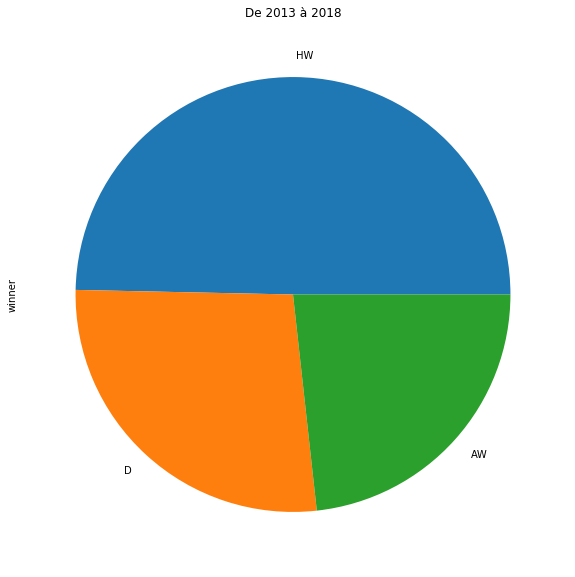

In [146]:
eda['winner'].value_counts().plot.pie(figsize=(15,10),title='De 2013 à 2018')

In [12]:
times=eda[['home_team','away_team','winner','datetime']]

# Vitórias por mando em casa

In [152]:
temp=times.groupby(['winner'])['home_team'].value_counts()
temp2=pd.DataFrame(temp)
temp2=temp2.rename(columns={'home_team':'#_vitorias'})
temp2=temp2.reset_index()
vitorias_hw=temp2[temp2['winner']=='HW']

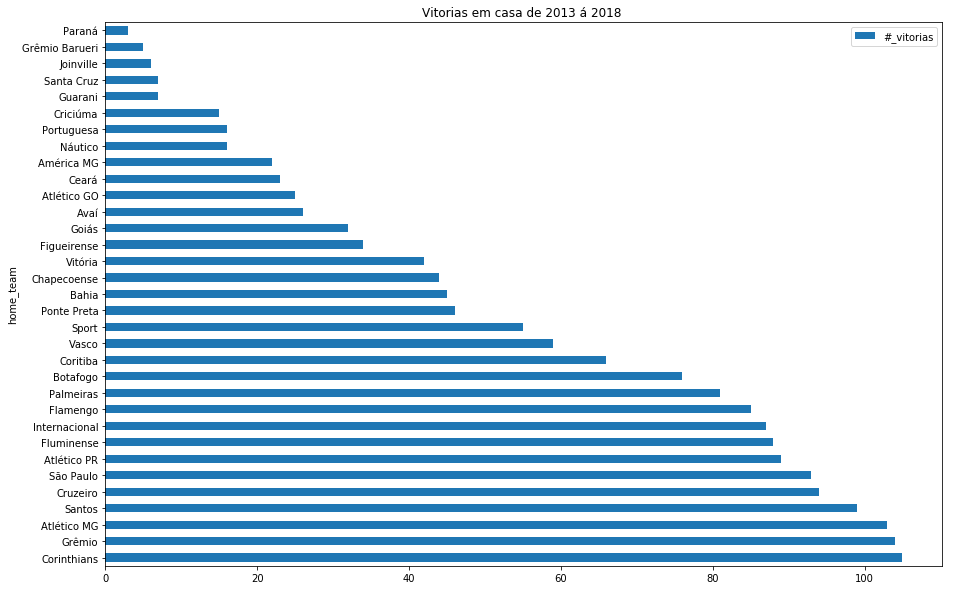

In [154]:
vitorias_hw.set_index('home_team').plot.barh(figsize=(15,10), title='Vitorias em casa de 2013 á 2018 ')

# Empates em casa

In [21]:
empates_hw=temp2[temp2['winner']=='D']

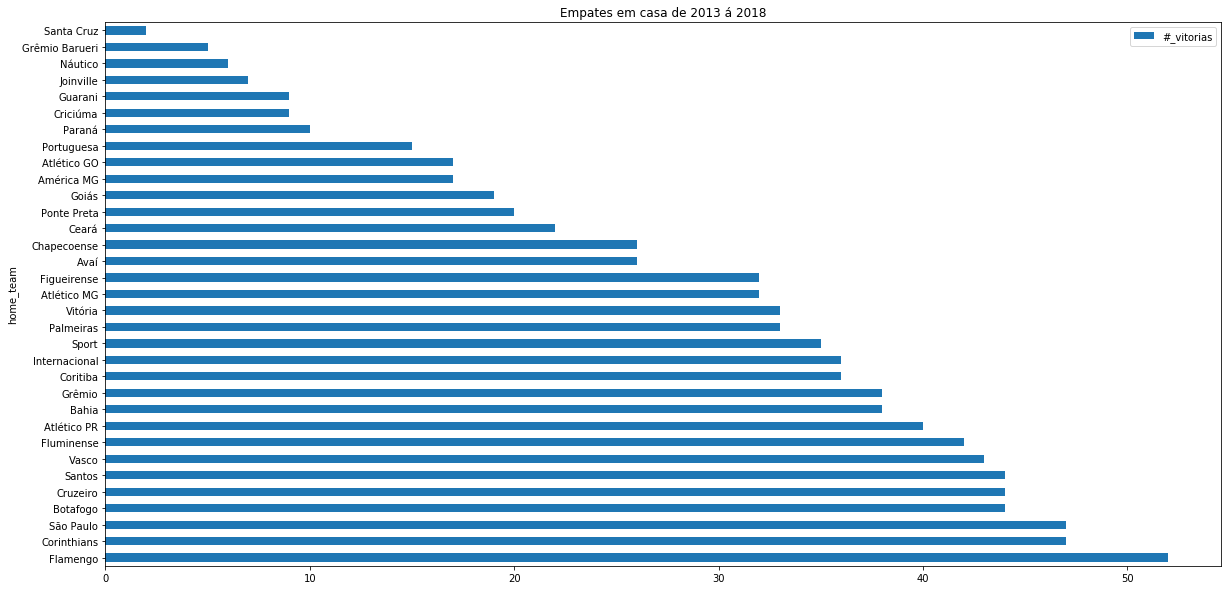

In [156]:
empates_hw.set_index('home_team').plot.barh(figsize=(20,10),title='Empates em casa de 2013 á 2018')

# Vitórias fora de casa

In [23]:
temp3=times.groupby(['winner'])['away_team'].value_counts()
temp3=pd.DataFrame(temp3)
temp3=temp3.rename(columns={'away_team':'#_vitorias'})
temp3=temp3.reset_index()
vitorias_aw=temp3[temp3['winner']=='AW']

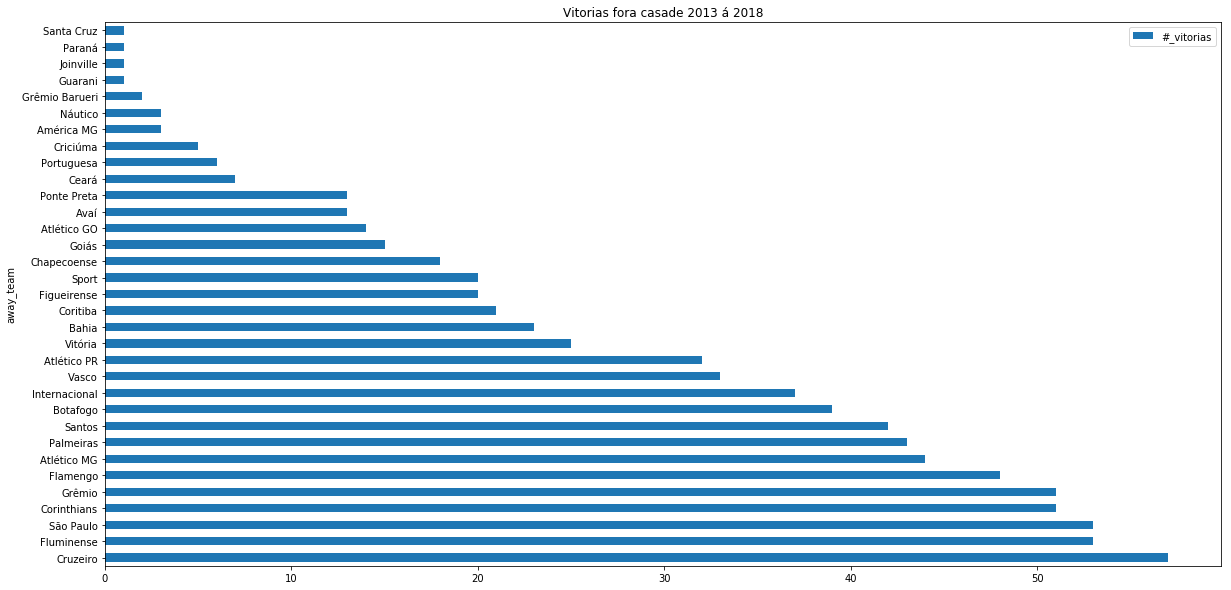

In [157]:
vitorias_aw.set_index('away_team').plot.barh(figsize=(20,10),title='Vitorias fora casade 2013 á 2018')

# Empates fora de casa

In [25]:
empates_aw=temp3[temp3['winner']=='D']

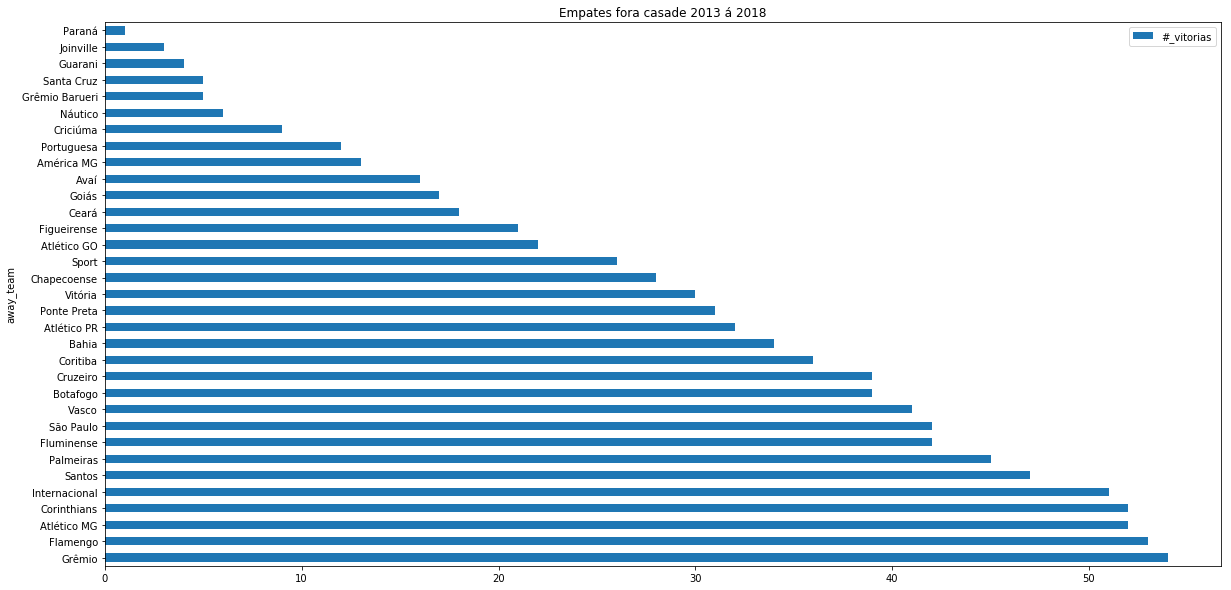

In [158]:
empates_aw.set_index('away_team').plot.barh(figsize=(20,10),title='Empates fora casade 2013 á 2018')

In [41]:
df=pd.read_csv('soccerDB4.csv')

In [28]:
df_2013=pd.read_csv('df_2013.csv')

In [31]:
df_2013=df_2013.drop('Unnamed: 0',axis=1)

In [116]:
cidade=df.groupby(['result','city']).count()

In [117]:
cidade=cidade.reset_index()

In [118]:
cidade=cidade[['result','city']]

In [119]:
cidade_map={'draw':2 , 'win':3, 'lose':1 }

In [120]:
cidade['result']=cidade['result'].map(cidade_map)

In [121]:
cidade['estado']=1

In [131]:
contador=0
for n in range(120):
    if 'São Paulo' in cidade['city'][contador]:
        cidade['estado'][contador]='SP'
    elif 'Minas Gerais' in cidade['city'][contador]:
        cidade['estado'][contador]='MG'
    elif 'Distrito Federal' in cidade['city'][contador]:
        cidade['estado'][contador]='DF'
    elif 'Rio Grande do Sul' in cidade['city'][contador]:
        cidade['estado'][contador]='RS'
    elif 'Mato Grosso' in cidade['city'][contador]:
        cidade['estado'][contador]='MT'
    elif 'Mato Grosso do Sul' in cidade['city'][contador]:
        cidade['estado'][contador]='MS'
    elif 'Paraná' in cidade['city'][contador]:
        cidade['estado'][contador]='PR'
    elif 'Santa Catarina' in cidade['city'][contador]:
        cidade['estado'][contador]='SC'
    elif 'Ceará' in cidade['city'][contador]:
        cidade['estado'][contador]='CE'
    elif 'Goiás' in cidade['city'][contador]:
        cidade['estado'][contador]='GO'
    elif 'Minas Gerais' in cidade['city'][contador]:
        cidade['estado'][contador]='MG'
    elif 'Rio de Janeiro' in cidade['city'][contador]:
        cidade['estado'][contador]='RJ'
    elif 'Pernambuco' in cidade['city'][contador]:
        cidade['estado'][contador]='PE'
    elif 'Bahia' in cidade['city'][contador]:
        cidade['estado'][contador]='BA'
    elif 'Maranhão' in cidade['city'][contador]:
        cidade['estado'][contador]='MA'    
    elif 'Rio Grande do Norte' in cidade['city'][contador]:
        cidade['estado'][contador]='RN' 
    elif 'Sergipe' in cidade['city'][contador]:
        cidade['estado'][contador]='SE' 
    elif 'Amazonas' in cidade['city'][contador]:
        cidade['estado'][contador]='AM'
    elif 'Pará' in cidade['city'][contador]:
        cidade['estado'][contador]='PA'
    elif 'Espírito Santo' in cidade['city'][contador]:
        cidade['estado'][contador]='ES'
    contador+=1
    

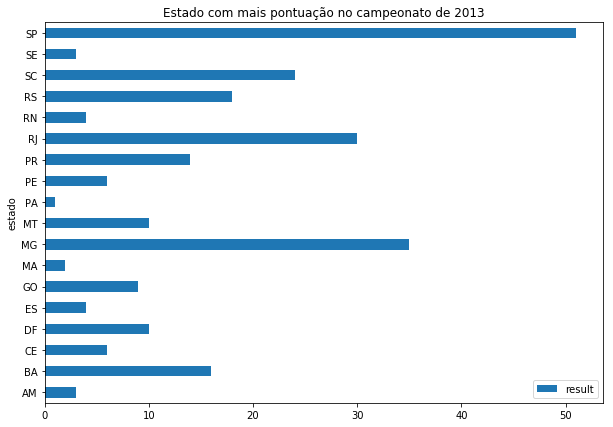

In [228]:
cidade.groupby('estado').sum().plot.barh(title='Estado com mais pontuação no campeonato de 2013',figsize=(10,7))

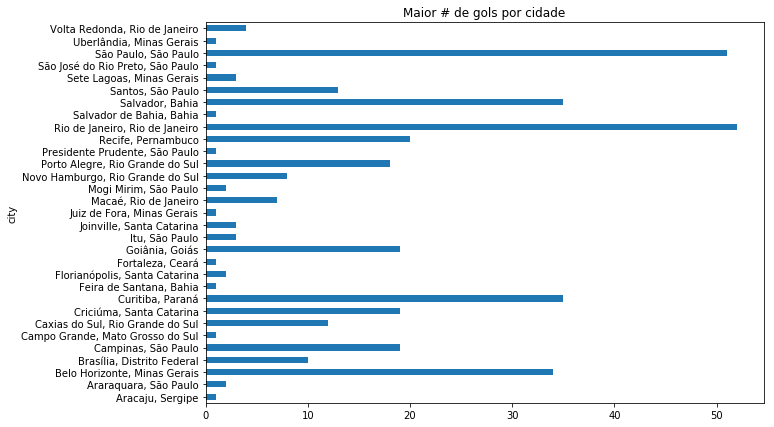

In [251]:
df_2013.groupby('city').count()['home_team_score'].plot.barh(figsize=(10,7),title='Maior # de gols por cidade 2013')

In [259]:
df_2013.groupby(['home_team','home_team_score']).count()

a_Ataques  a_Ataques perigosos  \
home_team     home_team_score                                   
Atlético MG   0                        2                    2   
              1                        3                    3   
              2                        8                    8   
              3                        3                    3   
              4                        2                    2   
              5                        1                    1   
Atlético PR   1                        8                    8   
              2                        7                    7   
              3                        2                    2   
              5                        1                    1   
              6                        1                    1   
Bahia         0                        7                    7   
              1                        5                    5   
              2                        6                    6   
              3                        1                    1   
Botafogo      0                        4                    4   
              1                        5                    5   
              2                        6                    6   
              3                        3                    3   
              4                        0                    0   
Corinthians   0                        8                    8   
              1                        7                    7   
              2                        3                    3   
              4                        1                    1   
Coritiba      0                        4                    4   
              1                        6                    6   
              2                        7                    7   
              4                        1                    1   
              5                        1                    1   
Criciúma      0                        4                    4   
              1                        8                    8   
              2                        3                    3   
              3                        4                    4   
Cruzeiro      0                        2                    2   
              1                        6                    6   
              2                        2                    2   
              3                        3                    3   
              4                        2                    2   
              5                        4                    4   
Flamengo      0                        4                    4   
              1                        7                    7   
              2                        6                    6   
              3                        1                    1   
              4                        1                    1   
Fluminense    0                        2                    2   
              1                        7                    7   
              2                        8                    8   
              3                        1                    1   
Goiás         0                        2                    2   
              1                       10                   10   
              2                        4                    4   
              3                        3                    3   
Grêmio        0                        3                    3   
              1                       10                   10   
              2                        4                    4   
              3                        2                    2   
Internacional 0                        4                    4   
              1                        6                    6   
              2                        6                    6   
              3                        1                    1   
 

In [159]:
df_2014=pd.read_csv('df_2014.csv')

In [163]:
df_2014=df_2014.drop('Unnamed: 0',axis=1)

In [165]:
df_2014.groupby('')

array(['Fluminense', 'Internacional', 'Chapecoense', 'Bahia', 'São Paulo',
       'Atlético MG', 'Atlético PR', 'Flamengo', 'Criciúma', 'Santos',
       'Coritiba', 'Palmeiras', 'Vitória', 'Botafogo', 'Corinthians',
       'Cruzeiro', 'Goiás', 'Sport', 'Figueirense', 'Grêmio'],
      dtype=object)

# Featuring
eficiencia ofensiva casa  2
eficiencia ofensiva fora  2
eficiencia defensiva casa 2
eficiencia defensiva fora 2
zona classificação (ega. libertadores)
diferença de gols ---- Renan
força atual  
força histórica
posição ---- Hermes
diferenca entre rodada atual e anterior
diferença entre posições dos times(ega o primeiro contra o décimo nono)